In [1]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [2]:
# Import libraries for Neural Network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# import os
import os
spark_version = 'spark-3.5.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [634 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,593 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ub

In [3]:
# Load the data through AWS S3 bucket
import pandas as pd

drop_url = "https://project-4-group-6-air-quality.s3.us-east-2.amazonaws.com/data_drop.csv"
data_drop = pd.read_csv(drop_url)
data_drop.head()

,Unnamed: 0,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,0,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,1,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,2,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4
3,3,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2
4,4,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0


In [4]:
data_drop.drop(['wd'], axis=1, inplace=True)
data_drop.head()

,Unnamed: 0,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,0,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,5.7
1,1,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,3.9
2,2,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,2.4
3,3,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,2.2
4,4,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,3.0


In [5]:
# Split the preprocessed data into features and target arrays
# Adjest df name as needed

y = data_drop['O3']
X = data_drop.drop("O3", axis="columns")

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# Create a StandardScaler to standardize dataset
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model
number_input_features = X_train.shape[1]
layer1 = 500
layer2 = 210

nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=number_input_features,
                             input_dim=number_input_features,
                             activation='relu'))

# Hidden layers
nn.add(tf.keras.layers.Dense(units=layer1,
                             activation='relu'))
nn.add(tf.keras.layers.Dense(units=layer2,
                             activation='relu'))

# Output layer : units =1, activation='sigmoid' recommended for this layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#Show summary
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                240       
                                                                 
 dense_6 (Dense)             (None, 500)               8000      
                                                                 
 dense_7 (Dense)             (None, 210)               105210    
                                                                 
 dense_8 (Dense)             (None, 1)                 211       
                                                                 
Total params: 113661 (443.99 KB)
Trainable params: 113661 (443.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss='huber_loss', optimizer='rmsprop', metrics=['mse', 'mae'])

In [20]:
# Fit the model with training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=25)

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = nn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X, y), callbacks=[early_stop])

Epoch 1/25
8360/8360 [==============================] - 41s 5ms/step - loss: 55.7958 - mse: 6381.0864 - mae: 56.2865
Epoch 2/25
8360/8360 [==============================] - 39s 5ms/step - loss: 55.7957 - mse: 6381.0747 - mae: 56.2863
Epoch 3/25
8360/8360 [==============================] - 37s 4ms/step - loss: 55.7956 - mse: 6381.0742 - mae: 56.2862
Epoch 4/25
8360/8360 [==============================] - 38s 5ms/step - loss: 55.7957 - mse: 6381.0791 - mae: 56.2863
Epoch 5/25
8360/8360 [==============================] - 40s 5ms/step - loss: 55.7957 - mse: 6381.0605 - mae: 56.2863
Epoch 6/25
8360/8360 [==============================] - 38s 5ms/step - loss: 55.7957 - mse: 6381.0649 - mae: 56.2863
Epoch 7/25
8360/8360 [==============================] - 37s 4ms/step - loss: 55.7956 - mse: 6381.0728 - mae: 56.2863
Epoch 8/25
8360/8360 [==============================] - 40s 5ms/step - loss: 55.7955 - mse: 6381.0737 - mae: 56.2863
Epoch 9/25
8360/8360 [==============================] - 38s 5ms/

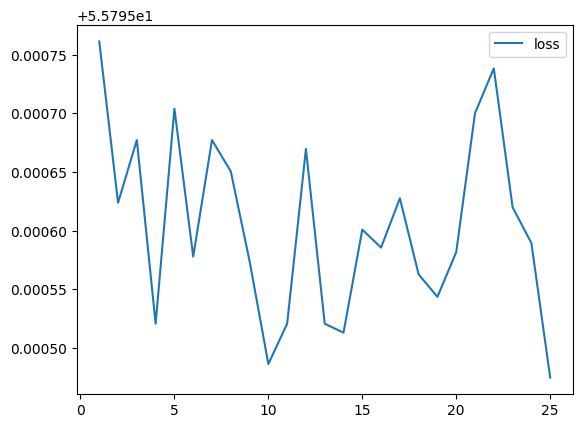

In [16]:
# Create a Dataframe and plot for the training history
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history)

history_df.index += 1

history_df.plot(y="loss")
plt.show()

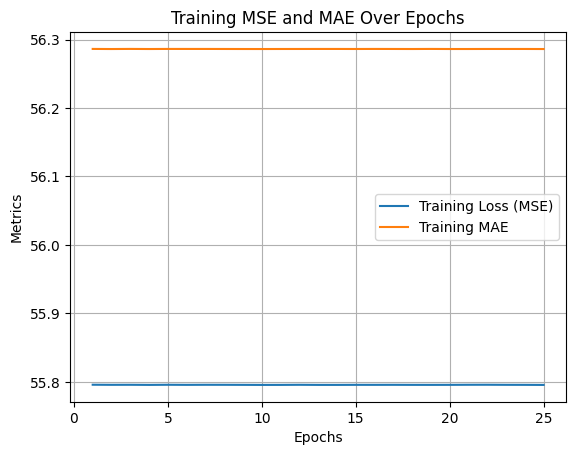

In [17]:
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['mae'], label='Training MAE')

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training MSE and MAE Over Epochs')
plt.legend()
plt.grid(True)
plt.show()